# Getting Started with Kaggle

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.shape

(891, 12)

In [4]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
test = pd.read_csv("test.csv")

In [6]:
test.shape

(418, 11)

In [7]:
test.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


### Exploring the Data

The following is the descriptions contained in that data dictionary: 
- `PassengerID` - A column added by Kaggle to identify each row and make submissions easier
- `Survived` - Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- `Pclass` - The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- `Sex` - The passenger's sex
- `Age` - The passenger's age in years
- `SibSp` - The number of siblings or spouses the passenger had aboard the Titanic
- `Parch` - The number of parents or children the passenger had aboard the Titanic
- `Ticket` - The passenger's ticket number
- `Fare` - The fare the passenger paid
- `Cabin` - The passenger's cabin number
- `Embarked` - The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

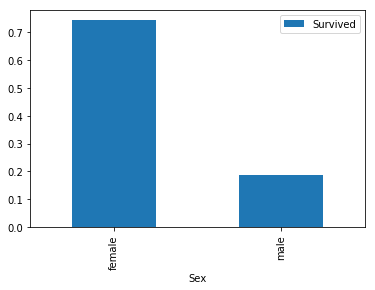

In [8]:
sex_pivot = train.pivot_table(index="Sex",values="Survived")
sex_pivot.plot.bar()
plt.show()

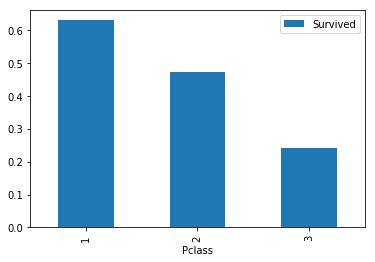

In [9]:
Pclass_pivot = train.pivot_table(index="Pclass",values="Survived")
Pclass_pivot.plot.bar()
plt.show()

### Converting Age to a catergorical variable

In [10]:
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

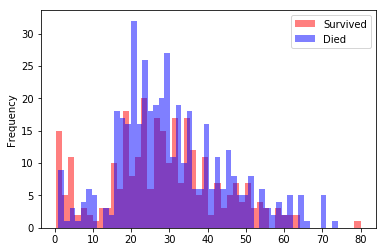

In [11]:
survived = train[train["Survived"] == 1]
died = train[train["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

In [12]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

In [13]:
cut_points = [-1,0,5,12,18,35,60,100]
label_names = ['Missing','Infant','Child','Teenager','Young Adult','Adult','Senior']

In [14]:
train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

In [15]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult


In [16]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Young Adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Adult
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Senior
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Young Adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Young Adult


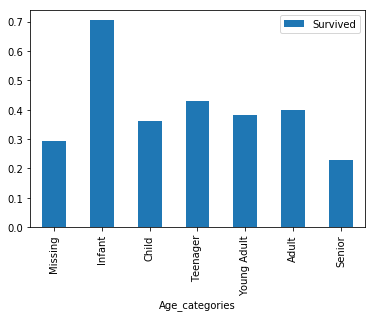

In [17]:
age_pivot = train.pivot_table(index='Age_categories',values='Survived')
age_pivot.plot.bar()
plt.show()

### Preparing selected columns for Machine Learning

In [18]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [19]:
train = create_dummies(train,"Pclass")
test = create_dummies(test,"Pclass")

In [20]:
train = create_dummies(train,"Sex")
test = create_dummies(test,"Sex")

In [21]:
train = create_dummies(train,"Age_categories")
test = create_dummies(test,"Age_categories")

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,1,0,0


In [23]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,1,0,1,0,0,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,1,1,0,0,0,0,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,...,0,0,1,0,0,0,0,0,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,...,1,0,1,0,0,0,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,...,1,1,0,0,0,0,0,1,0,0


### Training a Logistic Regression model

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
columns = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
           'Age_categories_Missing','Age_categories_Infant',
           'Age_categories_Child', 'Age_categories_Teenager',
           'Age_categories_Young Adult', 'Age_categories_Adult',
           'Age_categories_Senior']

In [26]:
lr = LogisticRegression()
lr.fit(train[columns],train['Survived'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Testing the Logistic Regression model

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
holdout = test

In [29]:
all_X = train[columns]
all_y = train['Survived']

In [30]:
train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size = 0.2, random_state = 0)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
lr = LogisticRegression()
lr.fit(train_X,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
predictions = lr.predict(test_X)
accuracy = accuracy_score(test_y,predictions)
accuracy

0.8100558659217877

### Using k-fold cross validation to reduce overfitting

In [34]:
from sklearn.model_selection import cross_val_score

In [39]:
lr = LogisticRegression()

In [37]:
scores = cross_val_score(lr,all_X,all_y,cv=10)
scores

array([0.8       , 0.81111111, 0.7752809 , 0.87640449, 0.80898876,
       0.78651685, 0.76404494, 0.76404494, 0.83146067, 0.80681818])

In [38]:
accuracy = np.mean(scores)
accuracy

0.8024670865963002

### Making Predictions on Kaggle's 'test' data

In [42]:
lr=LogisticRegression()
lr.fit(all_X,all_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
holdout_predictions = lr.predict(holdout[columns])

### Creating a submission file

In [44]:
holdout_ids = holdout["PassengerId"]
submission_df = {"PassengerId": holdout_ids, "Survived": holdout_predictions}

In [45]:
submission = pd.DataFrame(submission_df)
submission.to_csv('submission.csv', index = False)